# multiple linear regression

## 1th step: importing needed packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score

## 2th step: read data

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head(10)

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   
5       2014  ACURA         RLX     MID-SIZE         3.5          6   
6       2014  ACURA          TL     MID-SIZE         3.5          6   
7       2014  ACURA      TL AWD     MID-SIZE         3.7          6   
8       2014  ACURA      TL AWD     MID-SIZE         3.7          6   
9       2014  ACURA         TSX      COMPACT         2.4          4   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   
5          AS6        Z                  11.9                  7.7   
6          AS6        Z                  11.8                  8.1   
7          AS6        Z                  12.8                  9.0   
8           M6        Z                  13.4                  9.5   
9          AS5        Z                  10.6                  7.5   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244  
5                  10.0                        28           230  
6                  10.1                        28           232  
7                  11.1                        25           255  
8                  11.6                        24           267  
9                   9.2                        31           212

## 3nd step: data exploration
Let's twiddle with my data

In [3]:
df.describe()

MODELYEAR   ENGINESIZE    CYLINDERS  FUELCONSUMPTION_CITY  \
count     1067.0  1067.000000  1067.000000           1067.000000   
mean      2014.0     3.346298     5.794752             13.296532   
std          0.0     1.415895     1.797447              4.101253   
min       2014.0     1.000000     3.000000              4.600000   
25%       2014.0     2.000000     4.000000             10.250000   
50%       2014.0     3.400000     6.000000             12.600000   
75%       2014.0     4.300000     8.000000             15.550000   
max       2014.0     8.400000    12.000000             30.200000   

       FUELCONSUMPTION_HWY  FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  \
count          1067.000000           1067.000000               1067.000000   
mean              9.474602             11.580881                 26.441425   
std               2.794510              3.485595                  7.468702   
min               4.900000              4.700000                 11.000000   
25%               7.500000              9.000000                 21.000000   
50%               8.800000             10.900000                 26.000000   
75%              10.850000             13.350000                 31.000000   
max              20.500000             25.800000                 60.000000   

       CO2EMISSIONS  
count   1067.000000  
mean     256.228679  
std       63.372304  
min      108.000000  
25%      207.000000  
50%      251.000000  
75%      294.000000  
max      488.000000

creating a custom data frame

In [4]:
cdf = df[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
cdf.head(10)

ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0         2.0          4                   9.9                  6.7   
1         2.4          4                  11.2                  7.7   
2         1.5          4                   6.0                  5.8   
3         3.5          6                  12.7                  9.1   
4         3.5          6                  12.1                  8.7   
5         3.5          6                  11.9                  7.7   
6         3.5          6                  11.8                  8.1   
7         3.7          6                  12.8                  9.0   
8         3.7          6                  13.4                  9.5   
9         2.4          4                  10.6                  7.5   

   FUELCONSUMPTION_COMB  CO2EMISSIONS  
0                   8.5           196  
1                   9.6           221  
2                   5.9           136  
3                  11.1           255  
4                  10.6           244  
5                  10.0           230  
6                  10.1           232  
7                  11.1           255  
8                  11.6           267  
9                   9.2           212

a basic understanding of the data with the histogram

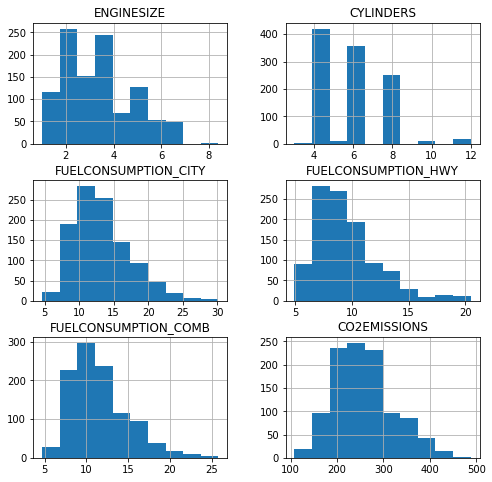

In [5]:
viz = cdf[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
viz.hist(figsize=(8, 8))
plt.show()

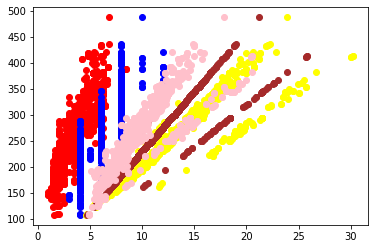

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color="red")
ax.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color="blue")
ax.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color="yellow")
ax.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color="brown")
ax.scatter(cdf.FUELCONSUMPTION_HWY, cdf.CO2EMISSIONS, color="pink")
plt.show()

## 4th step: split data to train and test

In [7]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]

print(len(df))

# to understand more
print(len(df))
print(len(train), "  ", len(train) / len(df))
print(len(test), "  ", len(test) / len(df))

1067
1067
843    0.7900656044985942
224    0.2099343955014058


## 5th step: modeling

In [8]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

regr.fit(train_x, train_y)

print('Coefficients: ', regr.coef_)
print('Intersept: ', regr.intercept_)

Coefficients:  [[11.73808162  7.27549248  9.22795971]]
Intersept:  [67.43711521]


evaluation

In [9]:
test_x = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_COMB"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_= regr.predict(test_x)

print("mean absolute error: %.2f" % np.mean(np.absolute(test_y_-test_y)))
print("mean absolute error: %.2f" % np.mean(np.absolute(test_y-test_y_)))
print("residual sum of squares (MAE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("residual sum of squares (MAE): %.2f" % np.mean((test_y - test_y_) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

mean absolute error: 17.25
mean absolute error: 17.25
residual sum of squares (MAE): 554.84
residual sum of squares (MAE): 554.84
R2-score: 0.87


in this section, we decided instead of "FUELCONSUMPTION_COMB" to use "FUELCONSUMPTION_CITY" and "FUELCONSUMPTION_HWY" separately

In [10]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])

regr.fit(train_x, train_y)

print('Coefficients: ', regr.coef_)
print('Intersept: ', regr.intercept_)

Coefficients:  [[11.78296977  6.825524    6.25758724  2.60326685]]
Intersept:  [68.88570328]


evaluation

In [11]:
test_x = np.asanyarray(test[["ENGINESIZE", "CYLINDERS", "FUELCONSUMPTION_CITY", "FUELCONSUMPTION_HWY"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_= regr.predict(test_x)

print("mean absolute error: %.2f" % np.mean(np.absolute(test_y_-test_y)))
print("mean absolute error: %.2f" % np.mean(np.absolute(test_y-test_y_)))
print("residual sum of squares (MAE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("residual sum of squares (MAE): %.2f" % np.mean((test_y - test_y_) ** 2))
print("R2-score: %.2f" % r2_score(test_y, test_y_))

mean absolute error: 17.28
mean absolute error: 17.28
residual sum of squares (MAE): 558.24
residual sum of squares (MAE): 558.24
R2-score: 0.87
